<img src="https://raw.githubusercontent.com/retkowsky/images/master/logo%20azure%20cog%20svcs.jpg">

Documentation : https://azure.microsoft.com/en-us/services/cognitive-services/

In [26]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [27]:
import datetime
now = datetime.datetime.now()
print(now)

2020-07-07 13:47:18.710025


# Bing Search API

In [28]:
subscription_key = 'AREMPLACER'
assert subscription_key

Next, verify that the `search_url` endpoint is correct. At this writing, only one endpoint is used for Bing search APIs. If you encounter authorization errors, double-check this value against the Bing search endpoint in your Azure dashboard.

In [29]:
search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"

Set `search_term` to look for images of puppies.

In [30]:
search_term = "Covid-19"

The following block uses the `requests` library in Python to call out to the Bing search APIs and return the results as a JSON object. Observe that we pass in the API key via the `headers` dictionary and the search term via the `params` dictionary. To see the full list of options that can be used to filter search results, refer to the [REST API](https://docs.microsoft.com/en-us/rest/api/cognitiveservices/bing-images-api-v7-reference) documentation.

In [31]:
import requests

headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
params  = {"q": search_term, "license": "public", "imageType": "photo"}
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()
search_results = response.json()

The `search_results` object contains the actual images along with rich metadata such as related items. For example, the following line of code can extract the thumbnail URLS for the first 16 results.

In [32]:
thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"][:16]]

Then, we can use the `PIL` library to download the thumbnail images and the `matplotlib` library to render them on a $4 \times 4$ grid.

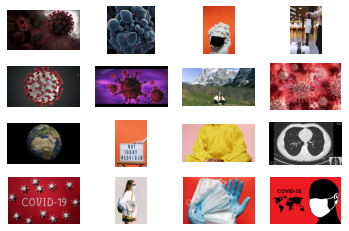

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

f, axes = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        image_data = requests.get(thumbnail_urls[i+4*j])
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))        
        axes[i][j].imshow(image)
        axes[i][j].axis("off")